#1、首先导入数据，数据为2019年纽约Airbnb公开数据

In [ ]:
import pandas as pd
import numpy as np

filename="https://raw.githubusercontent.com/ShaoZC/Data-Analysis-Using-Python/master/new-york-city-airbnb-open-data.csv"
AB_NYC_2019=pd.read_csv(filename)


#2、其次导入地图处理代码

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#3、开始绘制地图

##3.1 绘制美国人口分布示意图
这部分是我模仿的，3.2开始由我自己完成

In [13]:
import pandas as pd
import numpy as np
filename="https://raw.githubusercontent.com/ShaoZC/Data-Analysis-Using-Python/master/2014_us_cities.csv"
AB_NYC_2019=pd.read_csv(filename)
# print(AB_NYC_2019.head(10))
lat=np.array(AB_NYC_2019['lat'])
lon=np.array(AB_NYC_2019['lon'])
rev=np.array(AB_NYC_2019['pop'],dtype=float)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='stere',lat_0=90,lon_0=-105,\
            llcrnrlat=23 ,urcrnrlat=45,\
            llcrnrlon=-126.1,urcrnrlon=-65,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
map.drawmapboundary()   
map.drawstates()        
map.drawcoastlines()    
map.drawcountries()     
# map.drawcounties()      
size=(rev/np.max(rev))*1000
x,y = map(lon,lat)
map.scatter(x,y,s=size)
plt.title('Population distribution in America')
plt.show()
#Python/Basemap绘制美国人口分布示意图
#https://blog.csdn.net/ouening/article/details/54983701

<Figure size 640x480 with 1 Axes>

##3.2 利用Basemap绘制纽约Airbnb分布情况

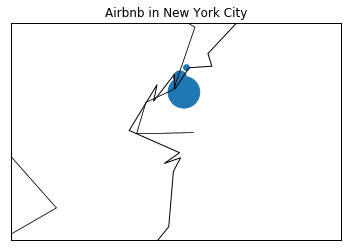

In [14]:
import pandas as pd
import numpy as np
# filename="https://raw.githubusercontent.com/ShaoZC/Data-Analysis-Using-Python/master/new-york-city-airbnb-open-data.csv"
filename="C:/Users/wade z shao/Documents/GitHub/Data-Analysis-Using-Python-2019/new-york-city-airbnb-open-data.csv"
AB_NYC_2019=pd.read_csv(filename)
# print(AB_NYC_2019.head(10))
lat=np.array(AB_NYC_2019['latitude'][1:5])
lon=np.array(AB_NYC_2019['longitude'][1:5])
rev=np.array(AB_NYC_2019['number_of_reviews'][1:5],dtype=float)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='stere',lat_0=40,lon_0=-74,\
            llcrnrlat=40 ,urcrnrlat=41,\
            llcrnrlon=-75,urcrnrlon=-73,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
map.drawmapboundary()
map.drawstates()
map.drawcoastlines()
map.drawcountries()
# map.drawcounties()
size=(rev/np.max(rev))*1000
x,y = map(lon,lat)
map.scatter(x,y,s=size)
plt.title('Airbnb in New York City')
plt.show()

##3.3 利用plotly绘制纽约Airbnb分布情况

In [3]:
places="C:/Users/wade z shao/Documents/GitHub/Data-Analysis-Using-Python-2019/new-york-city-airbnb-open-data.csv"
# filename="https://raw.githubusercontent.com/ShaoZC/Data-Analysis-Using-Python/master/new-york-city-airbnb-open-data.csv"
import pandas as pd
import plotly.graph_objects as go
places=pd.read_csv(places)[0:50]
#print(places.head())
token='pk.eyJ1Ijoid2FkZXNoIiwiYSI6ImNrM28yeW1uZzF3d3EzbXBobGI2aHJvcDUifQ.Z4mYNvOTNS32aLaRD-A2ZQ'
fig = go.Figure(go.Scattermapbox(mode='markers',
                                 lon = places['longitude'],
                                 lat = places['latitude'],
                                 hovertext = places['name'],
                                 hoverinfo = 'text',
                                 marker_symbol = 'marker',
                                 marker_size = 15
                                 ))
fig.update_layout(mapbox = {'accesstoken': token, 'center': {'lon': -73.97237, 'lat': 40.64749}, 'zoom': 11},
                  margin = {'l': 0, 'r': 0, 't': 0, 'b': 0})
# fig.show()
#https://zhuanlan.zhihu.com/p/87163211
#https://nbviewer.jupyter.org/github/BlackSheepwall0305/share-Jupyter-Notebooks/blob/master/%E7%9F%A5%E4%B9%8E_%E5%9C%B0%E5%9B%BE%E5%9B%9E%E7%AD%94.ipynbpla

In [10]:
import pandas as pd
import plotly.express as px
places = "C:/Users/wade z shao/Documents/GitHub/Data-Analysis-Using-Python-2019/new-york-city-airbnb-open-data.csv"
places=pd.read_csv(places)
places=places[0:50]#数值实在太多了，仅取前50做演示
token = 'pk.eyJ1Ijoid2FkZXNoIiwiYSI6ImNrM28yeW1uZzF3d3EzbXBobGI2aHJvcDUifQ.Z4mYNvOTNS32aLaRD-A2ZQ'
fig2 = px.scatter_mapbox(places,
                         lon='longitude',
                         lat='latitude',
                         size='price',
                         size_max=15,
                         color="number_of_reviews",
                         # color_continuous_scale=px.colors.carto.Temps
                         color_continuous_scale=None
                         # color_continuous_scale=px.colors.sequential.Aggrnyl
                         )

fig2.update_layout(mapbox={'accesstoken': token,
                           'center': {'lon': -73.97237, 'lat': 40.64749},
                           'zoom': 11},
                   margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
fig2.show()

可以看出，plotly效果更突出，也带有动态效果，缺点是运行时间比较长。

the end